# Import libraries and dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('insurance.csv')

In [3]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
df.isnull().sum()
# No missing values in the dataset

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [5]:
# Features
X = df.drop(['charges'], axis=1)
# Labels
y = df['charges']

# Data preprocessing

## Split the dataset into train & test (For prediction purpose only)

In [26]:
# Split the dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## Create pipeline

In [22]:
# Encoding categorical labels & apply scaling
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

# Model
from sklearn.tree import DecisionTreeRegressor

# Instead of just using same test data we change the test data and train the model again to get the score
from sklearn.model_selection import cross_val_score
# For cross validation since test data is changing
from sklearn.pipeline import Pipeline

In [72]:
# Categorical columns
columns_to_encode = ['sex', 'smoker','region']
# Numeric columns
numeric_cols = ['age','bmi','children']

preprocessor = ColumnTransformer(
    transformers=[
        ('scaler', StandardScaler(), numeric_cols),
        ('encoder', OneHotEncoder(sparse_output=False), columns_to_encode)
    ],
    remainder='passthrough'
)

pipeline = Pipeline(
    steps=[
        ('preprocessor', preprocessor),
        ('regressor', DecisionTreeRegressor(max_depth=4))
    ]
)

# Evaluate model

In [73]:
# Goes through columntransformer then trains for each test block & returns r2_score for each fold
scores = cross_val_score(pipeline, X, y, cv=5)
print("CV R² scores:", scores)
print("Mean R² score:", scores.mean())

CV R² scores: [0.87395831 0.78501378 0.88215766 0.83665604 0.86698858]
Mean R² score: 0.8489548716393465


# Plot

In [74]:
import seaborn as sns
import matplotlib.pyplot as plt

In [75]:
# Fit the pipeline on training data
pipeline.fit(X_train, y_train)

# Predictions for plots
y_train_pred = pipeline.predict(X_train)
y_test_pred = pipeline.predict(X_test)

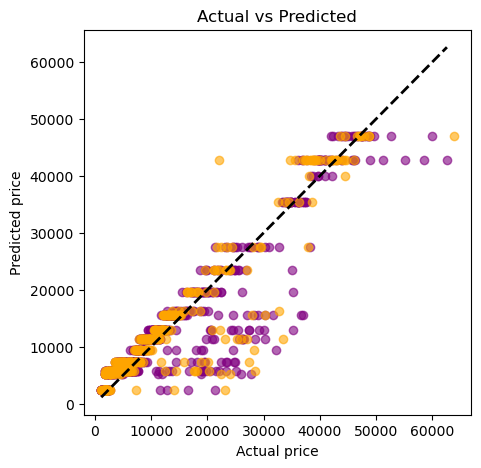

In [76]:
plt.figure(figsize=(5,5))
# Train data
plt.scatter(y_train, y_train_pred, alpha=0.6, color='purple')
# Test data
plt.scatter(y_test, y_test_pred, alpha=0.6, color='orange')
plt.xlabel('Actual price')
plt.ylabel('Predicted price')
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--', lw=2)
plt.title('Actual vs Predicted')
plt.show()

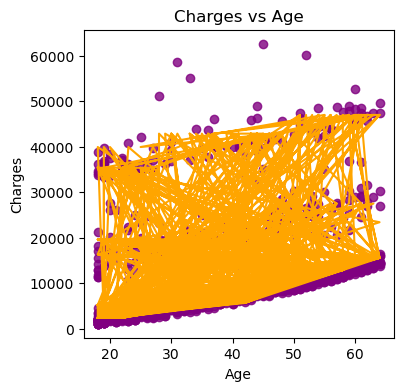

In [77]:
plt.figure(figsize=(4,4))
plt.scatter(X_train['age'], y_train, alpha=0.8, color='purple')
plt.plot(X_train['age'], y_train_pred, color='orange')
plt.xlabel('Age')
plt.ylabel('Charges')
plt.title('Charges vs Age')
plt.show()

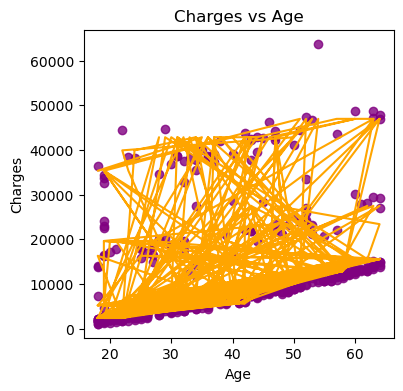

In [78]:
plt.figure(figsize=(4,4))
plt.scatter(X_test['age'], y_test, alpha=0.8, color='purple')
plt.plot(X_test['age'], y_test_pred, color='orange')
plt.xlabel('Age')
plt.ylabel('Charges')
plt.title('Charges vs Age')
plt.show()

In [79]:
from sklearn.tree import plot_tree

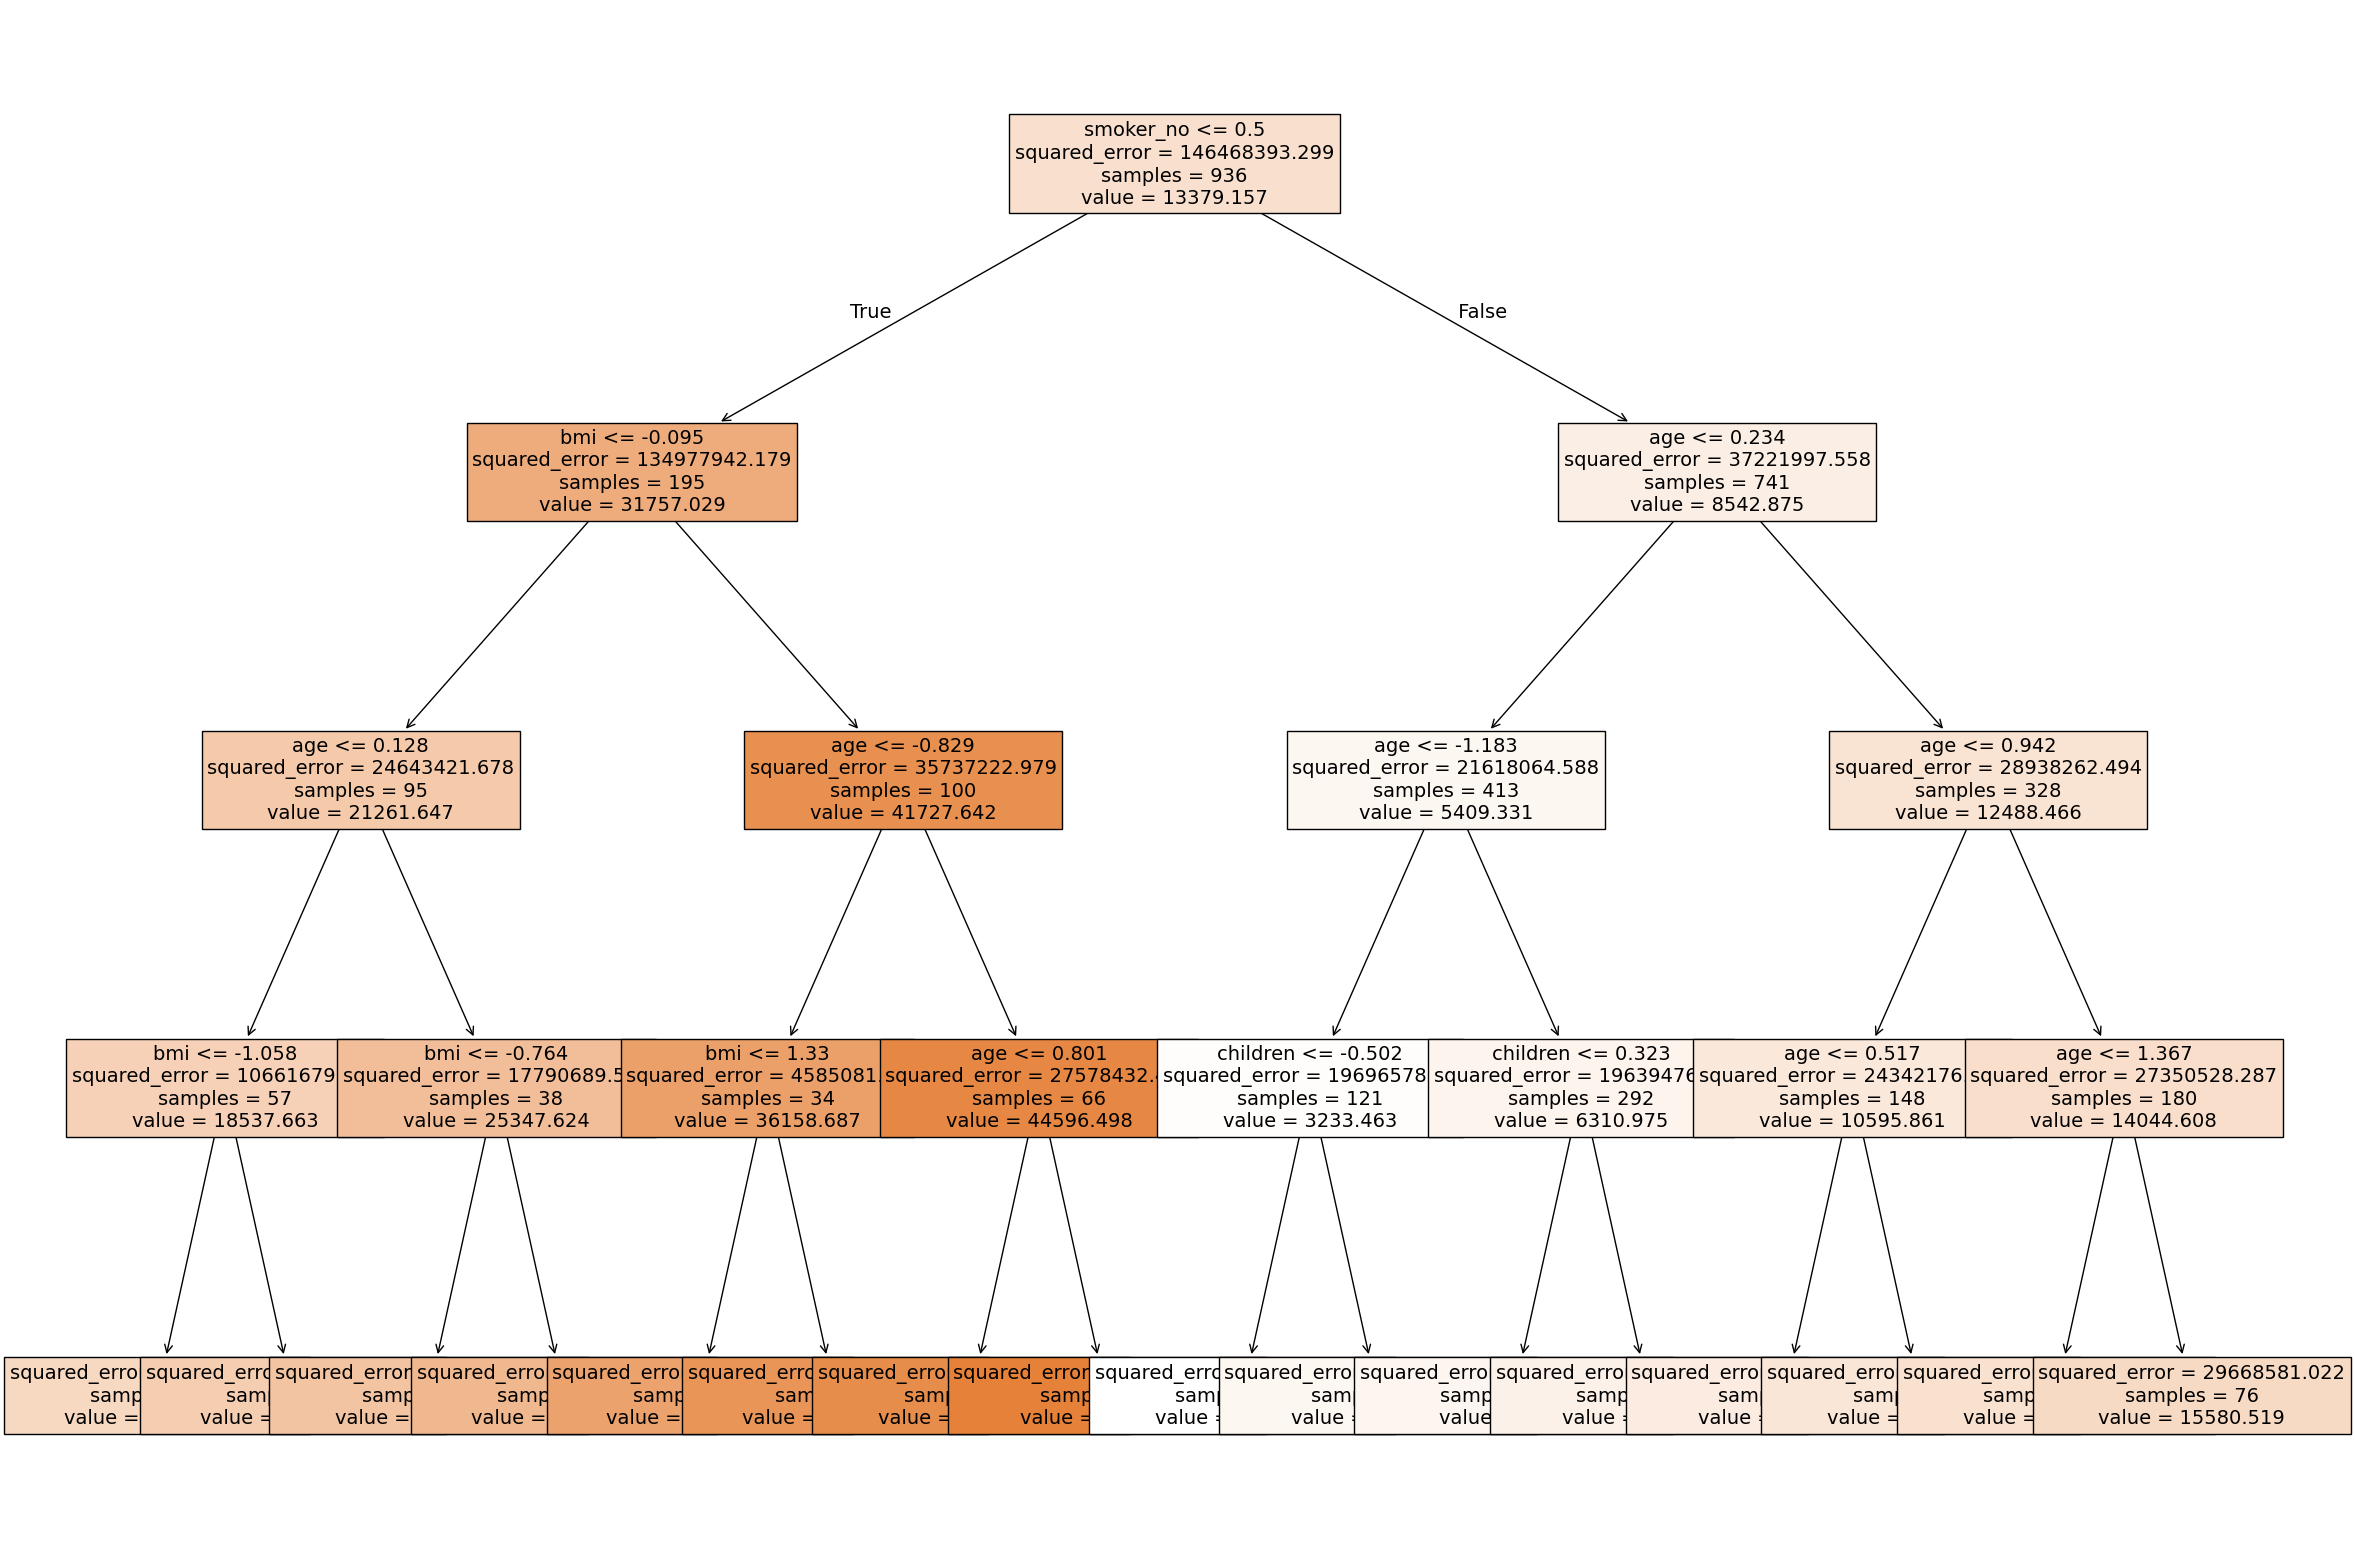

In [80]:
regressor = pipeline.named_steps['regressor']
# Visualize tree
fig = plt.figure(figsize=(28,20))
_ = plot_tree(regressor, feature_names=all_columns, filled=True, fontsize=14)